# Creando nuestra red neuronal usando numpy y matematicas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_gaussian_quantiles

Las características de nuestro dataset artificial serán los siguientes:

- Cantidad de muestras: n_samples = 1000
- Cantidad de características de entrada: n_features = 2
- Cantidad de clases a predecir: n_classes = 2

In [2]:
N = 1000

gaussian =  make_gaussian_quantiles(
    mean=None,
    cov=0.1,
    n_samples=N,
    n_features=2,
    n_classes=2,
    shuffle=True,
    random_state=None
)

X, Y = gaussian

In [3]:
X.shape

(1000, 2)

In [4]:
Y.shape

(1000,)

In [5]:
Y  = Y[:, np.newaxis]

In [6]:
Y

array([[1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
    

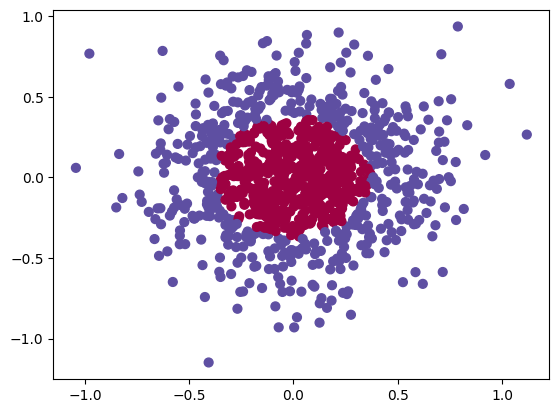

In [7]:
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral)
plt.show()

## Funciones de Activacion

Utilizaremos la función relu como función de activación para las capas ocultas y finalmente sigmoid como la última función de activación para la capa de clasificación.

In [8]:
def sigmoid(x, derivate=False):
    if derivate:
        return np.exp(-x) / ((np.exp(-x) + 1) ** 2)
    else:
        return 1 / (1 + np.exp(-x))


def relu(x, derivate=False):
    if derivate:
        x[x <= 0] = 0
        x[x > 0] = 1
        return x
    else:
        return np.maximum(0, x)

## Funcion de perdida

In [9]:
def mse(y, y_hat, derivate=False):
    if derivate:
        return 2*(y_hat - y)
    else:
        return np.mean((y_hat - y) ** 2)

## Función inicializadora de pesos

Cómo hemos visto en anteriores clases, cada capa de una red neuronal está definida por una serie de pesos `W` y de sesgos `b.` Cuando creamos una red neuronal debemos empezar definiendo estos valores con un valor por defecto aleatorio. Eventualmente los procesos de optimización iran mejorando estos pesos y sesgos aleatorios.

In [10]:
def initialize_parameters_deep(layers_dim):
    parameters = {}
    L = len(layers_dim)
    for l in range(0, L - 1):
        parameters['W'+str(l + 1)] = (np.random.rand(layers_dim[l], layers_dim[l + 1]) * 2) - 1
        parameters['b'+str(l + 1)] = (np.random.rand(1, layers_dim[l + 1]) * 2) - 1
    return parameters

In [11]:
layer_dims = [2, 4, 8, 1]

params = initialize_parameters_deep(layers_dim=layer_dims)

In [12]:
params

{'W1': array([[-0.02476342,  0.41736907,  0.73113442,  0.07520316],
        [ 0.25119419,  0.98831098, -0.97459607,  0.99640534]]),
 'b1': array([[ 0.47544302, -0.82071296,  0.18182409,  0.24213571]]),
 'W2': array([[-0.77976175,  0.76600929,  0.97046614,  0.76341181,  0.58503101,
          0.75365641,  0.06294273, -0.58269133],
        [ 0.74112453,  0.92356754,  0.66823241,  0.01557474,  0.52325754,
          0.58751052, -0.72081154, -0.91570682],
        [ 0.26242336, -0.15706715,  0.57578466,  0.71866219, -0.50802037,
          0.75324581,  0.1063694 , -0.02793059],
        [-0.69295774, -0.07021887, -0.50839789, -0.38502726,  0.75414373,
          0.24440006,  0.67484091,  0.7718994 ]]),
 'b2': array([[ 0.30002153,  0.34261408,  0.20701899, -0.82362359,  0.39163481,
          0.65165205, -0.98260446,  0.11781709]]),
 'W3': array([[-0.11272455],
        [-0.39385234],
        [-0.52834572],
        [ 0.13147049],
        [ 0.03381714],
        [ 0.35523949],
        [ 0.76651044],


## Entrenamiento forward de la red neuronal

### Forward Propagation

Vamos primeramente a definir en términos de variables de programación algunos de los conceptos que hemos estado manejando hasta el momento.

- X son las variables de entrada del modelo.

- Y son las etiquetas reales de las clases a predecir.

- Wi serán los pesos de la i-th capa.

- bi serán los sesgos de la i-th capa.

- Zi será la parte lineal del proceso de la red neuronal np.dot(X, W) + b de la i-th capa.

- Ai será la función de activación aplicada a Z de la i-th capa.

- y_hat es la predicción final de la red neuronal, correspondiente a A de la última capa.

- d{variable}i representa la derivada de cierta variable por ejemplo dW3corresponde a la derivada de los pesos de la capa 3.

Programamos un paso de nuestra función de forward propagation:

In [13]:
params['W1'].shape

(2, 4)

In [14]:
X.shape

(1000, 2)

In [15]:
np.matmul(X, params['W1']).shape

(1000, 4)

In [16]:
params['A0'] = X

params['Z1'] = np.matmul(params['A0'], params['W1']) + params['b1']
params['A1'] = relu(params['Z1'])

params['Z2'] = np.matmul(params['A1'], params['W2']) + params['b2']
params['A2'] = relu(params['Z2'])

params['Z3'] = np.matmul(params['A2'], params['W3']) + params['b3']
params['A3'] = sigmoid(params['Z3'])


output = params['A3']

In [17]:
output

array([[0.33780177],
       [0.32452365],
       [0.35011436],
       [0.31125282],
       [0.31655855],
       [0.31330104],
       [0.31447965],
       [0.34733641],
       [0.31412372],
       [0.33467196],
       [0.33376045],
       [0.32746983],
       [0.36672129],
       [0.31732002],
       [0.37585774],
       [0.3080514 ],
       [0.32106984],
       [0.35464438],
       [0.31934968],
       [0.39055053],
       [0.30970037],
       [0.31637057],
       [0.3177279 ],
       [0.31630779],
       [0.32586061],
       [0.34396528],
       [0.32626774],
       [0.3225149 ],
       [0.31265581],
       [0.34268393],
       [0.35530381],
       [0.32306664],
       [0.31811117],
       [0.31309309],
       [0.31299662],
       [0.324821  ],
       [0.34664121],
       [0.31425966],
       [0.33132646],
       [0.33398685],
       [0.34882423],
       [0.3289695 ],
       [0.32774669],
       [0.38166619],
       [0.31655314],
       [0.32405624],
       [0.31142932],
       [0.355

# Aplicando backpropagation y descenso del gradiente

## Backpropagation

En el proceso de backpropagation el primer paso es obtener el error entre el valor real Y y el valor predicho por la red y_hat. Una vez que se calculan las derivadas de Zy W de la última capa, entonces podemos ir para atrás calculando las otras dZ y dWpara las capas anteriores.

In [18]:
params['dZ3'] = mse(Y, output, True) * sigmoid(params['A3'], True)
params['dW3'] = np.matmul(params['A2'].T, params['dZ3'])

# Delta hacia atras -> Capa 2
params['dZ2'] = np.matmul(params['dZ3'], params['W3'].T) * relu(params['A2'], True)
params['dW2'] = np.matmul(params['A1'].T, params['dZ2'])

# Capa 1
params['dZ1'] = np.matmul(params['dZ2'], params['W2'].T) * relu(params['A1'], True)
params['dW1'] = np.matmul(params['A0'].T, params['dZ1'])

## Gradient descent

El último paso es ya con las derivadas calculadas podemos actualizar los pesos Wi y los bias bi de cada capa utilizando las derivadas calculadas en el punto anterior y un learning rate lr.

In [19]:
# Actualizar los pesos de la red neuronal

params['W3'] = params['W3'] - params['dW3'] * 0.001
params['b3'] = params['b3'] - (np.mean(params['dW3'], axis=0, keepdims=True)) * 0.001

params['W2'] = params['W2'] - params['dW2'] * 0.001
params['b2'] = params['b2'] - (np.mean(params['dW2'], axis=0, keepdims=True)) * 0.001


params['W1'] = params['W1'] - params['dW1'] * 0.001
params['b1'] = params['b1'] - (np.mean(params['dW1'], axis=0, keepdims=True)) * 0.001

## Train model function

In [20]:
def train(X_train, lr, params, training = True):
    params['A0'] = X_train

    params['Z1'] = np.matmul(params['A0'], params['W1']) + params['b1']
    params['A1'] = relu(params['Z1'])

    params['Z2'] = np.matmul(params['A1'], params['W2']) + params['b2']
    params['A2'] = relu(params['Z2'])

    params['Z3'] = np.matmul(params['A2'], params['W3']) + params['b3']
    params['A3'] = sigmoid(params['Z3'])


    output = params['A3']

    if training:
        # Backpropagation
        params['dZ3'] = mse(Y, output, True) * sigmoid(params['A3'], True)
        params['dW3'] = np.matmul(params['A2'].T, params['dZ3'])

        # Delta hacia atras -> Capa 2
        params['dZ2'] = np.matmul(params['dZ3'], params['W3'].T) * relu(params['A2'], True)
        params['dW2'] = np.matmul(params['A1'].T, params['dZ2'])

        # Capa 1
        params['dZ1'] = np.matmul(params['dZ2'], params['W2'].T) * relu(params['A1'], True)
        params['dW1'] = np.matmul(params['A0'].T, params['dZ1'])

        # Gradient Descent
        params['W3'] = params['W3'] - params['dW3'] * lr
        params['b3'] = params['b3'] - (np.mean(params['dW3'], axis=0, keepdims=True)) * lr

        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - (np.mean(params['dW2'], axis=0, keepdims=True)) * lr


        params['W1'] = params['W1'] - params['dW1'] * lr
        params['b1'] = params['b1'] - (np.mean(params['dW1'], axis=0, keepdims=True)) * lr

    return output

In [40]:
layer_dims = [2, 4, 8, 1]

params = initialize_parameters_deep(layers_dim=layer_dims)

errors = []

for _ in range(100_000):
    output = train(X, 0.000001, params=params)
    
    if _ % 25 == 0:
        print(mse(Y, output))
        errors.append(mse(Y, output))

0.26811300060015875
0.26787274934055744
0.2676420146089346
0.26742040913602566
0.26720751464279824
0.2670030131852078
0.2668065613659477
0.2666178263528147
0.2664364859732666
0.2662622299257539
0.2660947594367237
0.265933786920489
0.2657790365821819
0.26563025764967324
0.2654871782560847
0.26534955221899487
0.2652171665833376
0.2650897873875791
0.26496717742998294
0.26484912698415125
0.2647354346616847
0.264625907126529
0.2645203588161146
0.26441861166937863
0.26432049486172876
0.2642258491374086
0.2641345206220152
0.264046350550135
0.2639611945379612
0.26387891421731074
0.26379938068265163
0.2637224797922601
0.263648073866039
0.2635760464044811
0.26350631566726157
0.2634387452531588
0.2633732319621462
0.26330967809017525
0.26324799633326684
0.2631881018792689
0.2631298993853405
0.263073307082148
0.2630182234397871
0.2629645923694993
0.2629123482208335
0.26286142276672264
0.2628117508423509
0.26276328626641515
0.262715959703007
0.26266970856179844
0.2626244607121397
0.2625801732214228


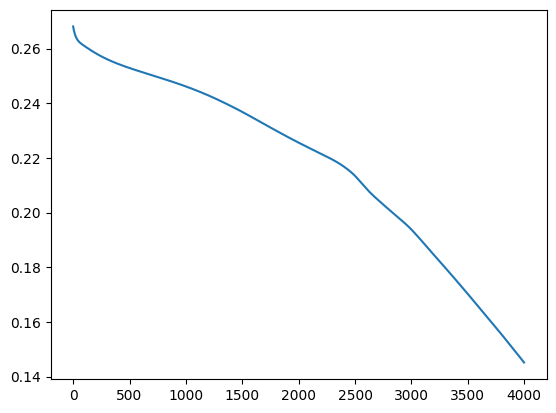

In [41]:
plt.plot(errors)

In [42]:
# Data de prueba
data_test = (np.random.rand(1000, 2) * 2) - 1

# Vamos a crear y

y = train(data_test, 0.001, params=params, training=False)

In [43]:
y = np.where(y >= 0.5, 1, 0)

In [44]:
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

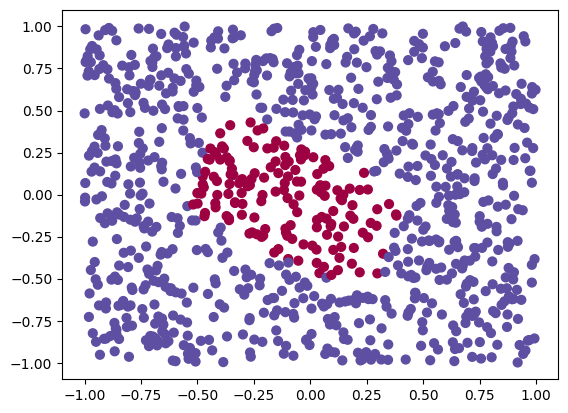

In [45]:
plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0], s=40, cmap=plt.cm.Spectral)
plt.show()